# Phase 2

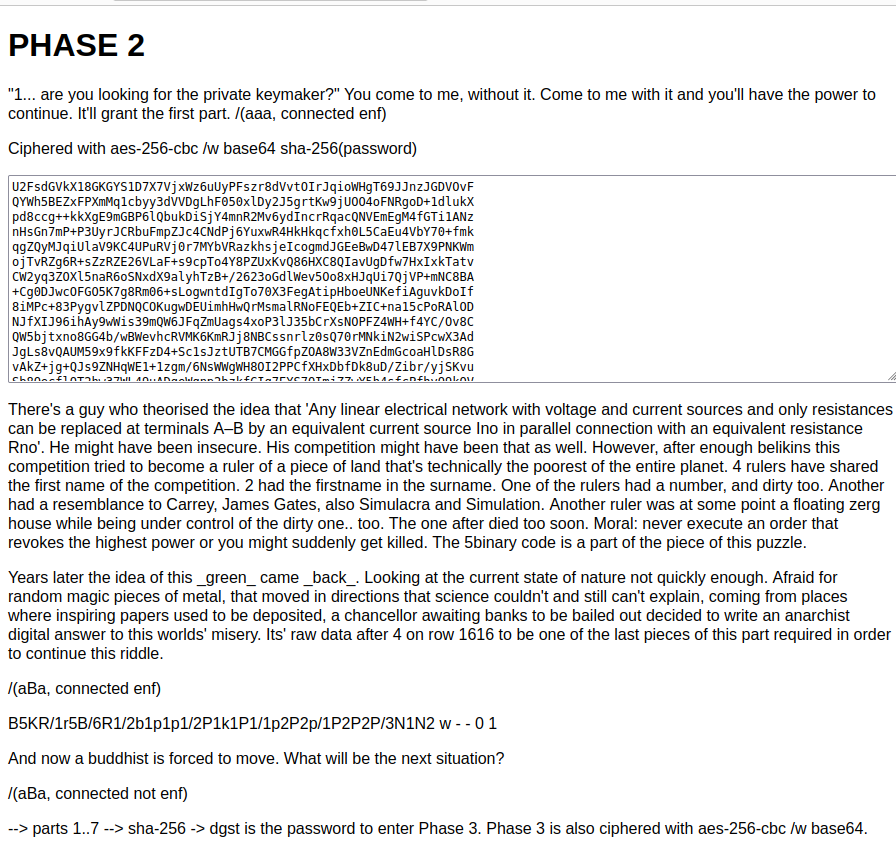


The url brings us to a phase with two clear distinct sections "PHASE 2" and "PHASE 3". 
Phase 2 is mostly textual clues and a blob of base64 encoded text (strings starting with `U2FsdGVkX18` typically indicate something encrypted using openssl and since `U2FsdGVkX18` is base64 of `Salted__`).

## Intro

We will start by looking at the very first section of phase 2

> "1... are you looking for the private keymaker?" You come to me, without it. Come to me with it and you'll have the power to continue. It'll grant the first part. /(aaa, connected enf)
> 
> Ciphered with aes-256-cbc /w base64 sha-256(password)

It implies that solving the first riddle here will grant us the password to decrypt the first encrypted blob.


## Observations

* There is a quoted string
* The riddle is referring to "it"
* The encrypted blob is "aes-256-cbc" then "base64" encoded. 
* "sha-256(password)" implies that we will need to hash the password with sha256 to use as a key for the aes blob
* `"1...` is a very strange string. what does it mean?
* `/(aaa, connected enf)` seems to be some clue

## Solving

Similar to the last phase, let's google the quote (`are you looking for the private keymaker?` no quotations) and see what comes up:

#### First search result
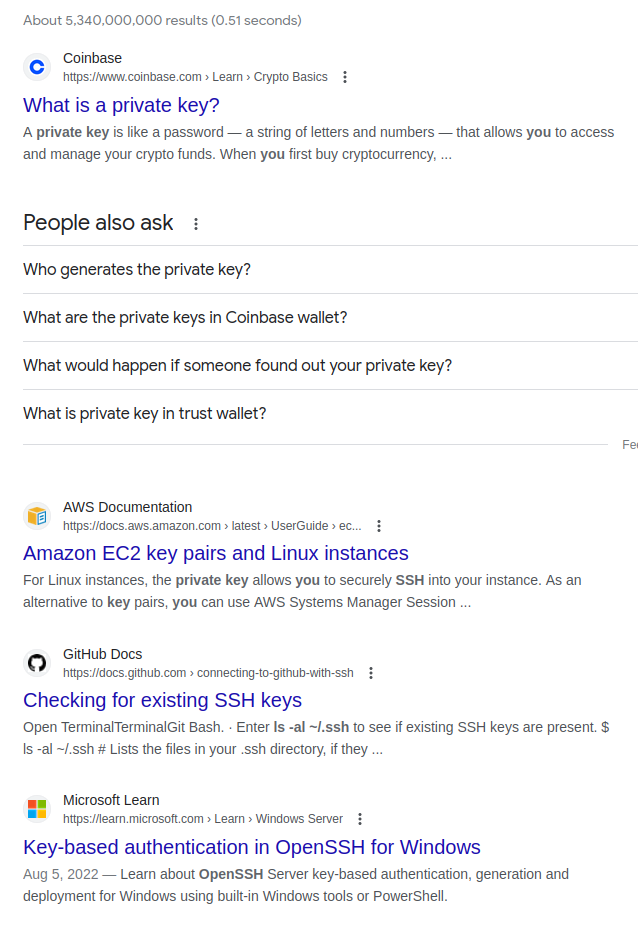

Mostly search results about cryptography and bitcoin, if we modify the query similarly to how we did in the previous phase and remove the obvious bitcoin related word we might have more success. 

<hr/>

#### Second search result
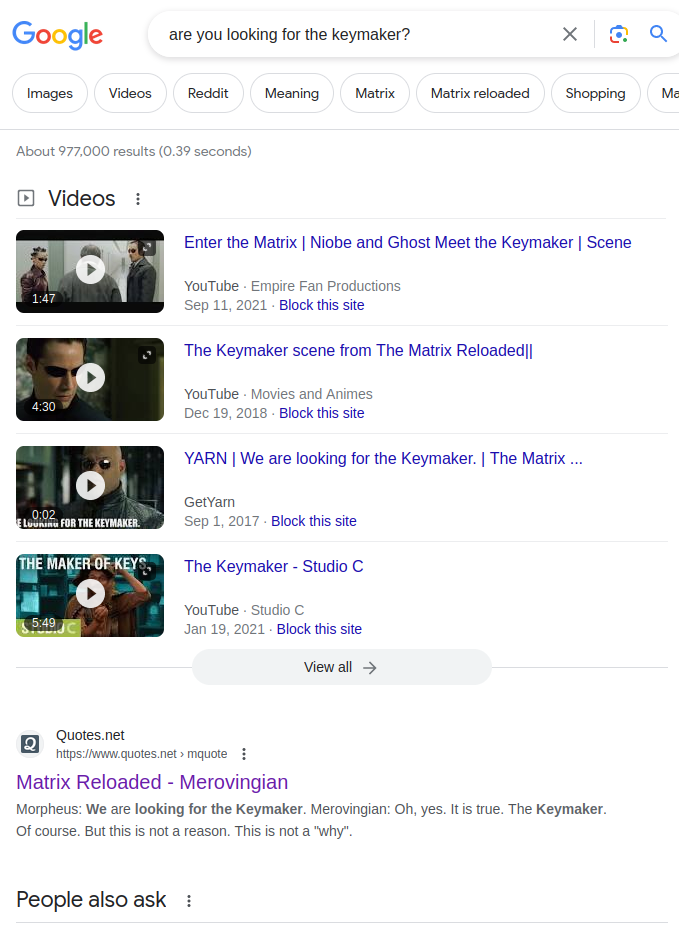



Now we know that the "theme" of this part of the puzzle is related to the matrix, and we can connect that back to phase 0 "follow the white rabbit", which we can infer that the rest of the puzzle might make referrences to the movie series. Knowing this, there might be other clues we missed, such as the url `choiceisanillusioncreatedbetweenthosewithpowerandthosewithoutaveryspecialdessertiwroteitmyself`

<hr/>

#### Third search result
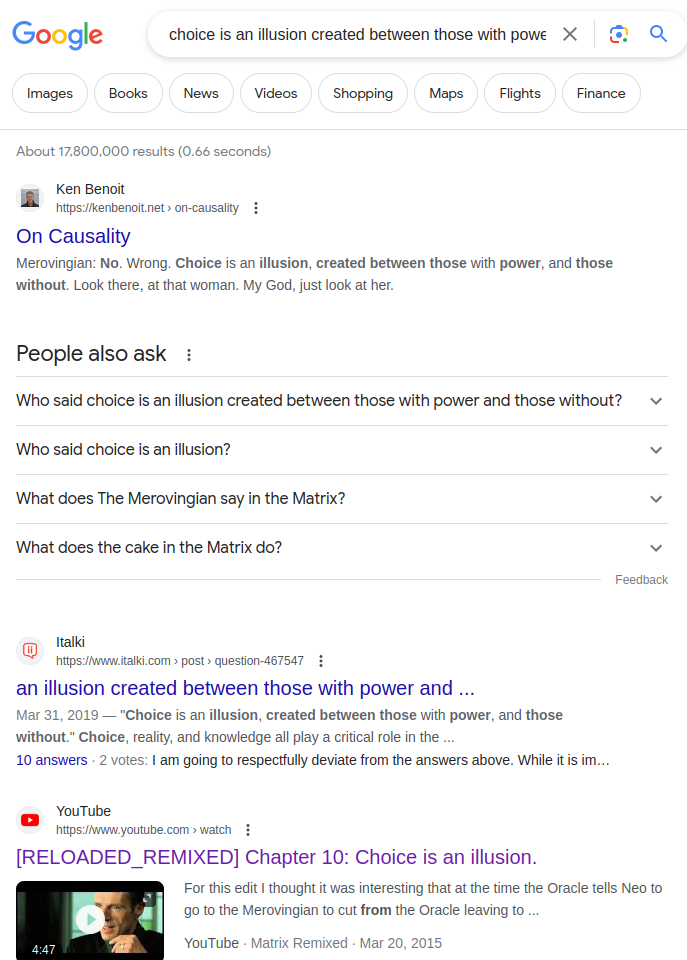

That's two clues for the first part that refer to "The Matrix: Reloaded" movie. 

<hr />

If we now read the rest of the clues to determine "it", we might have some guesses as to what the password is. 

> You come to me, without it. Come to me with it and you'll have the power to continue. It'll grant the first part.

What could we come to the puzzle with that will give us the power to continue? "choice" is the obvious one, however, "choice is an illusion", and if we look at the context of that quote we see 

> You see, there is only one constant, one universal, it is the only real truth: causality. Action. Reaction. Cause and effect.
> ...
> Beneath our poised appearance, the truth is we are completely out of control. Causality. There is no escape from it, we are forever slaves to it. Our only hope, our only peace is to understand it, to understand the why. "Why" is what separates us from them, you from me. "Why" is the only real social power, without it you are powerless. And this is how you come to me, without "why", without power. 

The Merovingian is now telling us that choice isn't power but an illusion, and that understanding "causality" is the only real power. Let's test this.

In [17]:
import hashlib
import subprocess
import os

phase2_aes_file = "./phase2-assets/phase2_aes.txt"


# our sha256()
def do_sha_hash(s):
    if isinstance(s, str):
        s = s.encode()
    m = hashlib.sha256()
    m.update(s)
    return m.hexdigest()

def decrypt_file(password):
    password_hash = do_sha_hash(password)

    try:
        # using subprocess because it's difficult to
        # do decryption directly in python
        with open("./phase2-assets/phase2.1.txt", 'w+') as fp:
            p = subprocess.run(
                [
                    "openssl",
                    "aes-256-cbc", # Our algorithm
                    "-in",
                    phase2_aes_file,
                    "-a", # the file is in "amoured" format base64
                    "-d", # decrypt it
                    "-pass",
                    f"pass:{password_hash}"
                ],
                check=True, # we expect it to run correctly
                stdout = fp,
                stderr = subprocess.DEVNULL,

            )
            p.check_returncode()
            print(f"decrypted with {password} ({password_hash})")
            return True
    except (subprocess.CalledProcessError, UnicodeDecodeError):
        # if either the command didn't return 0, or it gave us unicode garbage
        # we don't care
        pass
    return False

# lets try some guesses
GUESSES=[
    "choice",
    "causality",
    "illusion",
]
for guess in GUESSES:
    if decrypt_file(guess):
        break

decrypted with causality (eb3efb5151e6255994711fe8f2264427ceeebf88109e1d7fad5b0a8b6d07e5bf)


And we were correct, the first password is `causality`. 

# Phase 2.1

```
The ironic 2name of the keymakers trying to protect the current digital powers which are still in severe danger due to the keymaker's way of security by hiding, nearly unprotected, in plain sight. {eps3.4_[in one of the valleys of Phillip]runtime-error.r00., where daughters hit magic keypads} When this fails.. Crypto finally to the latin 3Moon? Tell me, 4How so mate?
# X 2 S H 4 Y 0 Q B 15 #
Q -> extend the name of a hackers' swordless fish, the I and W are below.
B -> ((BV80605001911AP)- (sqrt(-1)))^2
H -> (Answer to only this puzzle but nothing else) * -1
S -> cha' + (vagh * jav)
Ok kid, on the highway, let put it in the worst gear.
```

## Description

We now see new clues, and what is a new puzzle

## Observations
* There are some words that are prefixed with numbers: 2name, 3Moon, 4How
* We have more narrative which could be matrix related
* There is some strange code, or references with `{eps3.4_[in one of the valleys of Phillip]runtime-error.r00., where daughters hit magic keypads}`
* There is what looks to be some sort of algebraic formula to solve

## More thoughts
* We saw "1" in the phase2 intro with "1..."
* We can maybe assume that three dots might mean "replace the dots with a word"
* Now we have 1causality, 2name, 3Moon, 4How

## Solving

There no quotes for us to google this time around, however the `eps3.4_[in one of the valleys of Phillip]runtime-error.r00` part is very specific and so we should google it to see if there's context around it:

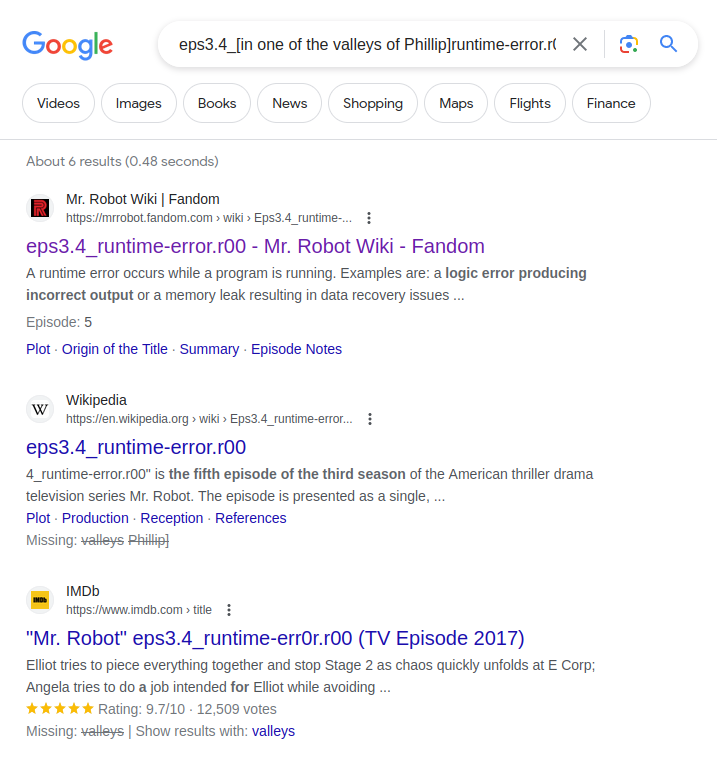

It appears that `eps3.4_runtime-error.r00` is referencing Search 3 episode 5 of the TV show Mr.Robot. We can make the assumption that phase 2.1 is in context of that episode and not the matrix as we first thought.
<hr/>

Let's look a bit deeper. We want to know what "in one of the valleys of Phillip" means, and who Phillip is. Looking at the Mr Robot characters, there is only a single character called "Phillip", who is "the CEO of E Corp". 

The rest of the strange part `{eps3.4_[in one of the valleys of Phillip]runtime-error.r00., where daughters hit magic keypads}` "where _daughters_ hit magic keypads" we see on [the wiki page of Phillip Price](https://mrrobot.fandom.com/wiki/Phillip_Price) that he has a daughter, Angela Moss. Obviously, we need to know a bit more about this episode to get some context. The plot synopsis from [Mr Robot Fandom](https://mrrobot.fandom.com/wiki/Eps3.4_runtime-error.r00):

> As Elliot heads to work at E Corp on September 29, he is confused when he realises he doesn't recall what happened for the past 4 days, and when he is locked out of the E Corp system. After realising that he has been fired, and that Stage 2 is happening on the same day, Elliot flees from the security and tries to head for the HSM to stop the attack, but is eventually escorted out of the building. As he stands in front of the E Corp protestors, Darlene tells him that she is working for the FBI, and reveals Angela's betrayal, much to his dismay. Shortly after this, masked men storm the E Corp building and create a riot. Irving reveals to Angela that this is the Dark Army's distraction so that Elliot can tamper with the HSM. Meanwhile, the UN allows China to annex the Congo, resulting in a victory for Whiterose. After being nearly caught twice, Angela tampers with the HSM in the secure room, but as she heads back to her office, Elliot confronts her. 

What stands out right away is the references to "stage 2", we're definitely on the right path. If we focus on Angela, we see that she "tampers with a HSM", or Hardware Security Module, which could explain the "magic keypads" in the clue, and also "the keymaker's way of security by hiding, nearly unprotected, in plain sight". HSMs store digital secrets, such as digital keys, in a piece of hardware.

<hr>

Taking a step back for a minte back to phase 2 as a whole, we see that we need "parts 1.. 7" to get into phase 3. We already know part 1 is "causality", and we found it by solving the context in which the "1" appeared, we can try doing something similar for 2, 3, 4

<hr>

> The ironic 2name of the keymakers trying to protect the current digital powers which are still in severe danger due to the keymaker's way of security by hiding, nearly unprotected, in plain sight

Now we've established that the keymakers are storing things on HSMs, we make the connection that 2 is the name of a company or person that makes HSMs (the keymakers are trying to protect other peoples secrets, but it's faulty), and in the Mr Robot universe, as before, let's use google:

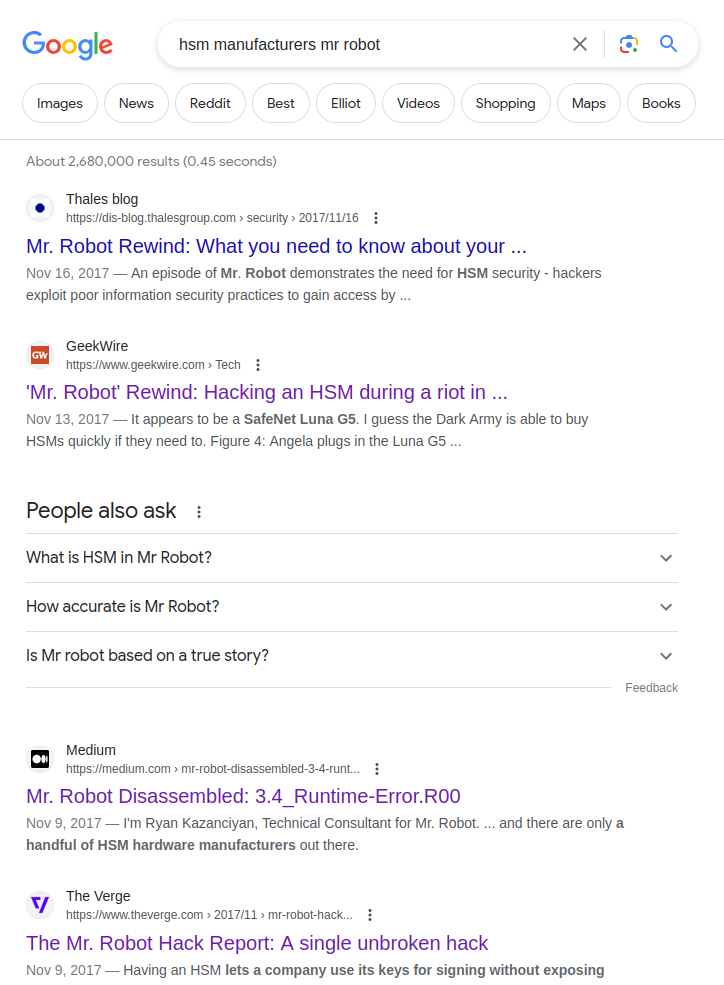

We immediate see something very interesting "SafeNet Luna G5", which might solve both parts 2 and 3 for us. Part 2, the manufacturer is possibly "SafeNet", and part 3 "latin 3moon" is "Luna" (the word "luna" being the Latin word for "moon). Looking more closely at part 4 "4How so mate?" we see in hindsight that it means "4**H**ow **S**o **M**ate".

And we get parts 2, 3, 4 as "SafeNet Luna HSM"



# Phase 2.1 Equation

```
# X 2 S H 4 Y 0 Q B 15 #
Q -> extend the name of a hackers' swordless fish, the I and W are below.
B -> ((BV80605001911AP)- (sqrt(-1)))^2
H -> (Answer to only this puzzle but nothing else) * -1
S -> cha' + (vagh * jav)
Ok kid, on the highway, let put it in the worst gear.
```

### Observations
* We see `X` and `Y`, could be an equation, or could be coordinates
* There are indiviual letters we have to solve

### Solving

#### S
Let's start with `S` as it seems the most easy, we can google the phrase and see if we can find what "cha", "vagh", and "jav" mean.

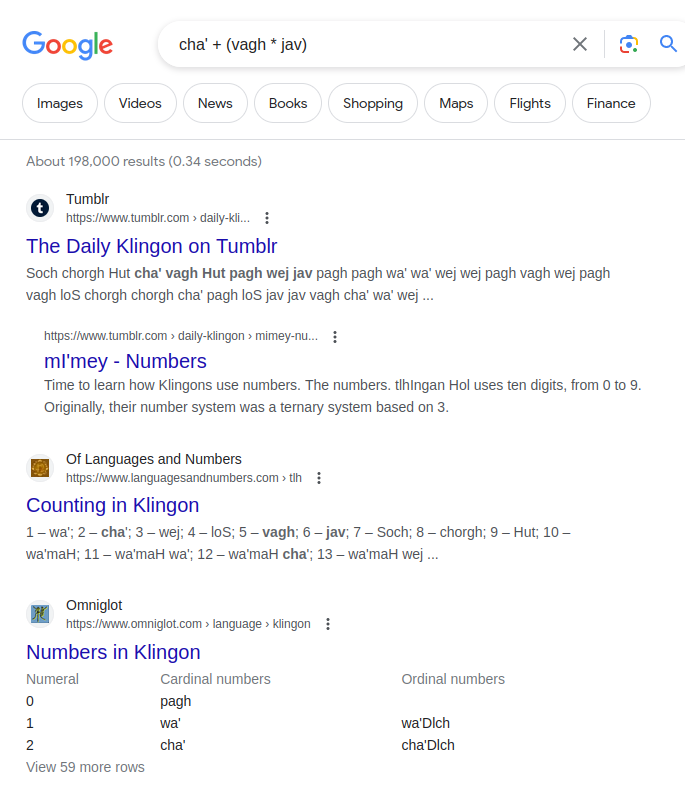

and we find out that they are klingon numbers, and that "S" might mean "Startreck"

cha' = 2, vagh = 5, jav = 6. We can solve S with simple substitution.
```
cha' = 2
vagh = 5
jav = 6

S -> cha' + (vagh * jav)
S -> 2 + (5 * 6)
S -> 2 + 30
S -> 32

```



#### B
Next is `B` as it has high information density, lets google the string that looks like a serial number

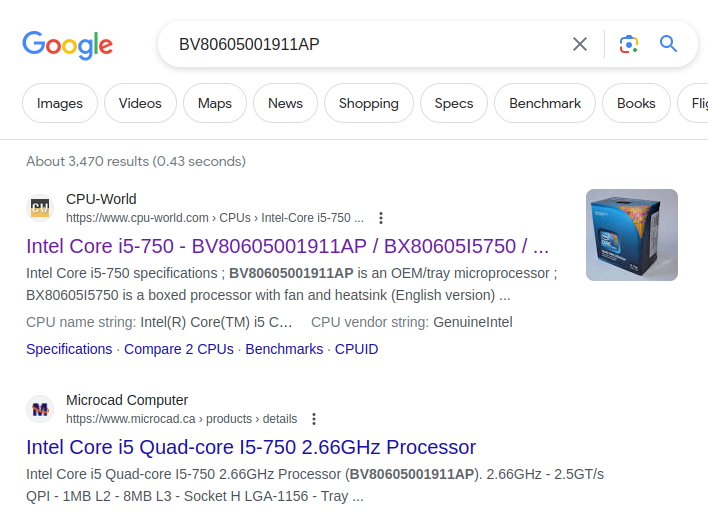

so we see the serial number is an intel i5, let's try plugging that into the equation

```
BV80605001911AP = i5
B -> ((BV80605001911AP)- (sqrt(-1)))^2
B -> (i5- (i))^2
B -> (i5 - i)^2
At this point we can notice that it's spelt "i5" and not "5i" as it would it most algebra, so either it means "5i - 1i" or it means "i5 removing i"
B1 -> (4i)^2
B1 -> -16  // choice 1

B2 -> (5)^2
B2 -> 25  // choice 2
```

We'll figure out which of the two choices we need later

#### Q

`Q -> extend the name of a hackers' swordless fish, the I and W are below.`

Given the theme in this part of the puzzle is Mr Robot, which is about the hacker Elliot, we can simply google if he has a fish:

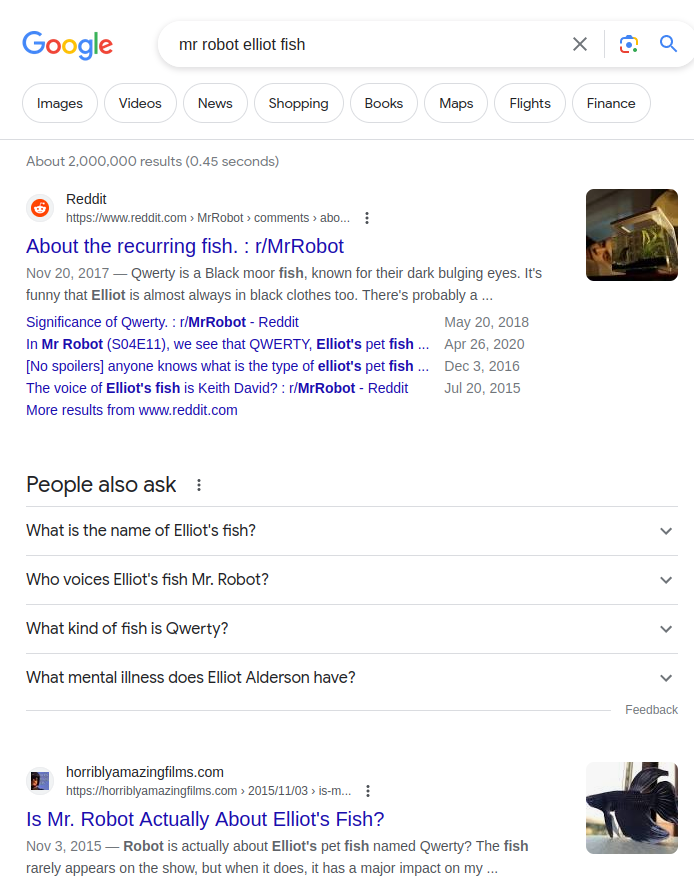


His fish is called "qwerty" (which is hinted at with the variable "Q") which is the top left row of a keyboard, to extend the name, it would be full top row qwertyuiop, the keys "i" and "w" are below numbers:
```
1234567890
qwertyuiop
```

I is below 8, and W is below 2, there for Q = 82

#### H

Finally, H.

`H -> (Answer to only this puzzle but nothing else) * -1`

Let use google again to see if we can find anything with that phrase

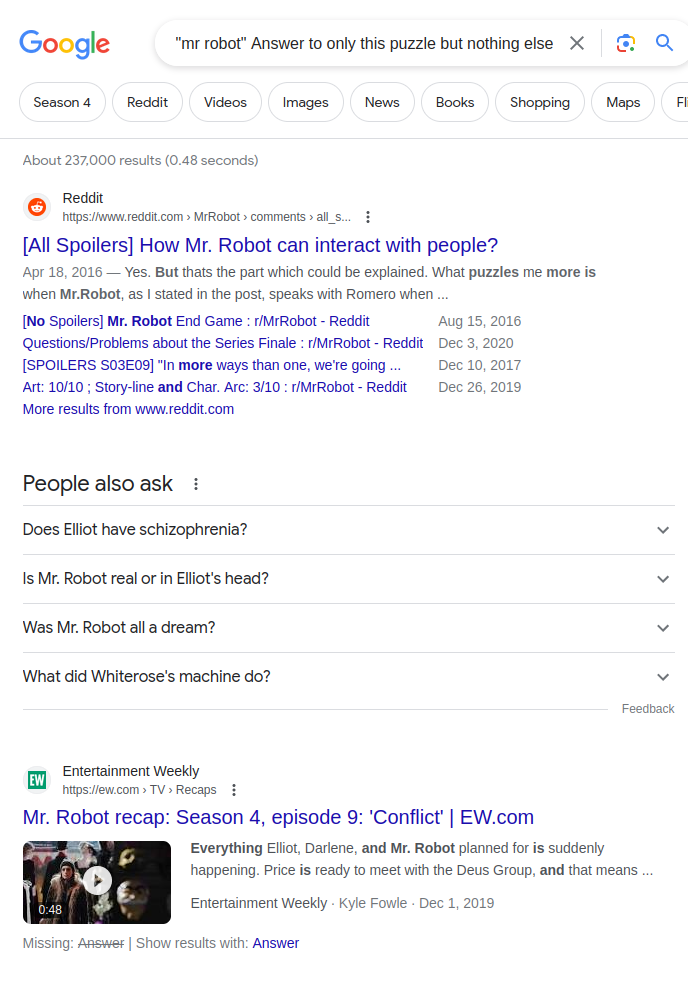
<hr>

Unfortunately, it looks like there is nothing useful, and we'll have to approach it a different way. It is very strangely worded, "only ... but nothing else", let's google again this time without the Mr Robot reference:

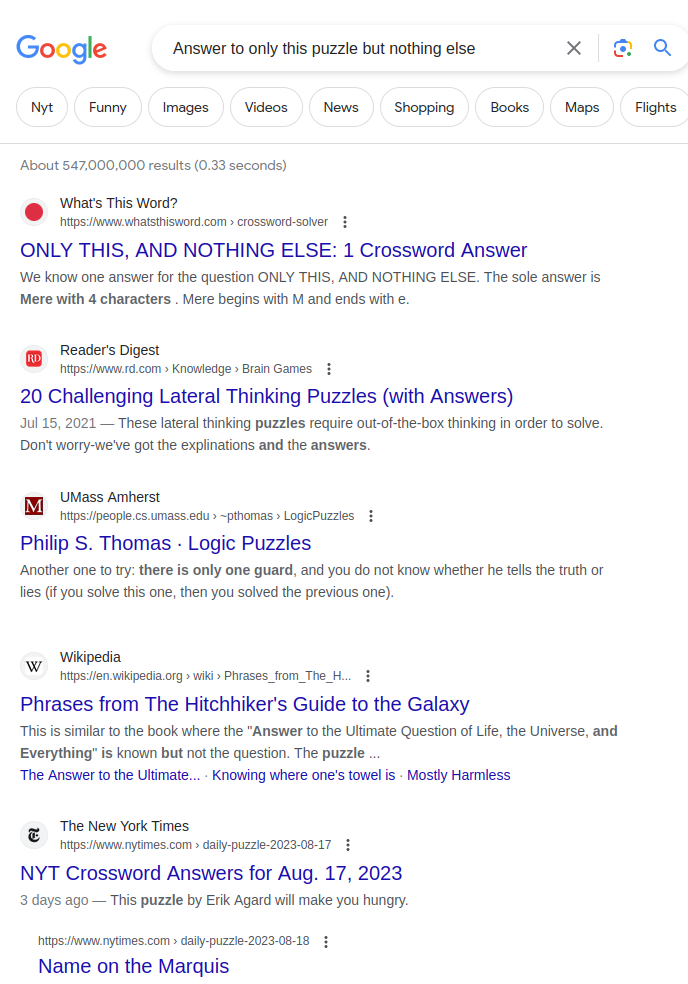

<hr>

This time, if we also take "H" as a clue, we can argue that it is a reference to the famous "The Hitchhiker's Guide to the Galaxy" question to learn the "Answer to the Ultimate Question of Life, The Universe, and Everything", and indeed, the quote from the puzzle seems to be the exact opposite of the Hitchhikers quote, we only want the answer to a specific thing, whereas the Hitchhikers quote is about everything. 

With that in mind, we can see that `* -1` now simply means to "negate", and if we negate our phrase "Answer to only this puzzle but nothing else", we end with "Answer to everything", which we know from The Hitchhiker's Guide to the Galaxy is `42`


`H = 42`

### Solution

And finally we have "Ok kid, on the highway, let put it in the worst gear", which we can determine that going in reverse is the worst gear for driving on a highway is. This implies that once we've substituted the variables, we'll have to reverse the result

#### 1. using B1

```
# X 2 S H 4 Y 0 Q B 15 #
S = 32
H = 42
Q = 82
B = -16

# X 2 32 42 4 Y 0 82 -16 15 #
reversed:

# 51 61- 28 0 Y 4 24 23 2 X #

```

4 sets of numbers, then `Y`, then 5 sets of numbers, then `X`. Coordinates with four parts where Y is before X is very likely a [Geographic Coordinate System](https://en.wikipedia.org/wiki/Geographic_coordinate_system)

Let's plug it in
51° 61-' 28.0" N 4° 24' 23.2' E

We see our issue with using B1 we can't have "61 minutes" thus, we'll have to try our "B2" solution

#### 2. using B2

```
# X 2 S H 4 Y 0 Q B 15 #
S = 32
H = 42
Q = 82
B = 25

# X 2 32 42 4 Y 0 82 25 15 #
reversed:

# 51 52 28 0 Y 4 24 23 2 X #

```

Coords: 51 52 28.0 N 4 24 23.2 E

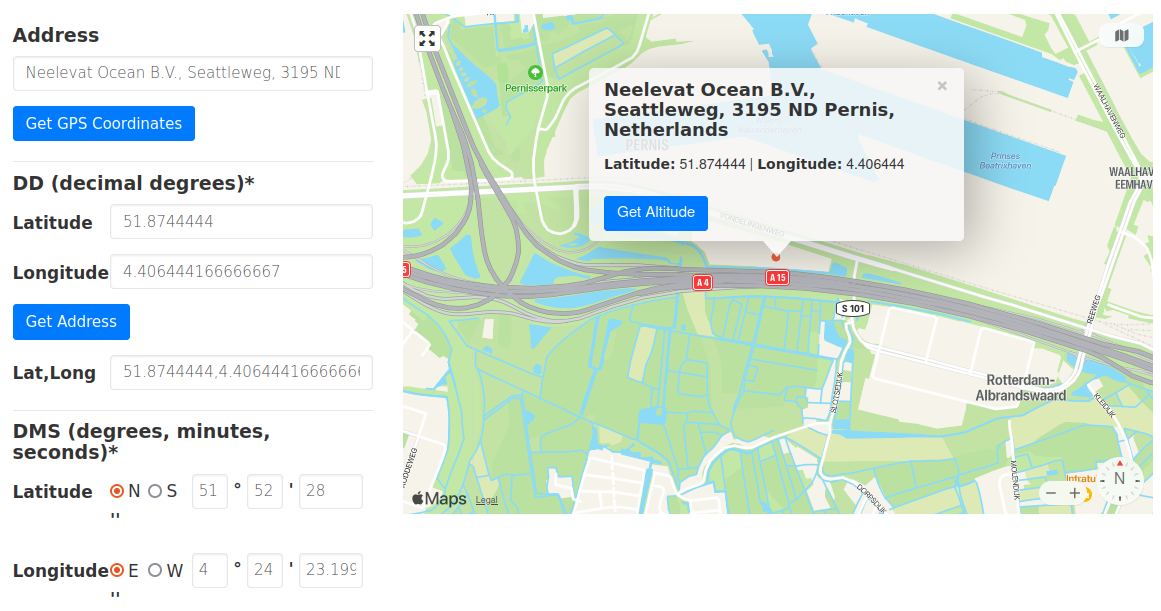

Unfortunately, it's not obvious what this points at, but given that phase 2.1 is referencing a physical thing - the SafeNet Luna HSM - we can see where they are made:

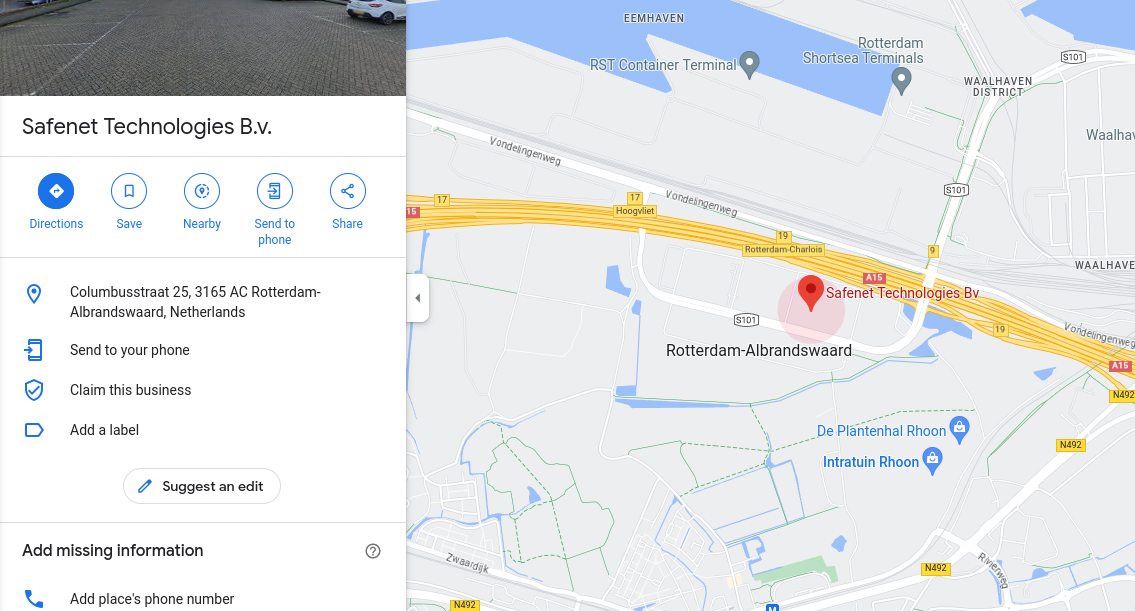

SafeNet Technologies are VERY close to the coordinates that we decoded. We can take this as a confirmation that our decoding of the 2,3,4 parts are correct

# Phase 2.2 - getting into Phase 3

## getting part 5

### Observations
The next part, 5 ("5binary code"), has a long rambly paragraph that we'll have to decode to solve, let's step through a few sentences at a time.

> There's a guy who theorised the idea that 'Any linear electrical network with voltage and current sources and only resistances can be replaced at terminals A–B by an equivalent current source Ino in parallel connection with an equivalent resistance Rno'.

If we google the quote we can see that the statement is a description of Norton's Theorem by Edward Lawry Norton and Hans Ferdinand Mayer

> He might have been insecure. His competition might have been that as well. However, after enough belikins this competition tried to become a ruler of a piece of land that's technically the poorest of the entire planet. 

These three sentences have yet to be understood

> 4 rulers have shared the first name of the competition. 2 had the firstname in the surname.

The USA had four presidents with the first name "John"
1. John Adams
2. John Quincy Adams
3. John Tyler
4. John F Kennedy

The USA had two presidents with the last night "Johnson"
1. Andrew Johnson
2. Lyndon B. Johnson

>  One of the rulers had a number, and dirty too. 

Not yet understood. But there were several presidents that were considered "dirty" or "corrupt", according to [this bbc article](https://www.bbc.com/news/world-us-canada-56246507) Lyndon B. Johnson was the first US president that wasn't "venerated as demigods" by the "childlike [...] Americans".

> Another had a resemblance to Carrey, James Gates, also Simulacra and Simulation.

* James Gates (also known as Jim Gates) is an American theoretical physicist.
* "Carrey", there the actor James Eugene Carrey, also known as Jim Carrey.
* "Simulacra and Simulation" - philosophical book that "seeks to examine the relationships between reality, symbols, and society, in particular the significations and symbolism of culture and media involved in constructing an understanding of shared existence."
    * "The simulacrum is never that which conceals the truth—it is the truth which conceals that there is none. The simulacrum is true."
    * Seems to be a theme used in The Matrix
* Otherwise unsolved

> Another ruler was at some point a floating zerg house while being under control of the dirty one.. too. 

Unsolved

> The one after died too soon.

* JFK was assassinated before Lyndon B. Johnson took over. 

> Moral: never execute an order that revokes the highest power or you might suddenly get killed. The 5binary code is a part of the piece of this puzzle.

* Assuming we're looking at JFK, let's look at [his *execut*ive *order*s](https://en.wikipedia.org/wiki/List_of_executive_actions_by_Richard_Nixon) for one that looks like binary:
1. [11000](https://en.wikisource.org/wiki/Executive_Order_11000) Assigning emergency preparedness functions to the Secretary of Labor 
2. [11001](https://en.wikisource.org/wiki/Executive_Order_11001) Assigning emergency preparedness functions to the Secretary of Health, Education, and Welfare 
3. [11010](https://en.wikisource.org/wiki/Executive_Order_11010) Amending Executive Order No. 10713, relating to the administration of the Ryukyu Islands 
4. [11011](https://en.wikisource.org/wiki/Executive_Order_11011) Creating an emergency board to investigate a dispute between the Trans World Airlines, Inc., and certain of its employees 
5. [11100](https://en.wikisource.org/wiki/Executive_Order_11100) Establishing the President's Commission on Registration and Voting Participation 
6. [11101](https://en.wikisource.org/wiki/Executive_Order_11101) Creating an emergency board to investigate disputes between the carriers represented by the Eastern, Western, and Southwestern Carriers' Conference Committees and certain of their employees 
7. [11110](https://en.wikisource.org/wiki/Executive_Order_11110) Amendment of Executive Order No. 10289, as amended, relating to the performance of certain functions affecting the Department of the Treasury 
8. [11111](https://en.wikisource.org/wiki/Executive_Order_11111) Providing assistance for the removal of obstructions of justice and suppression of unlawful combinations within the State of Alabama

We have 8 choices to choose from for part 5.


## Part 6

> Years later the idea of this _green_ came _back_. Looking at the current state of nature not quickly enough. Afraid for random magic pieces of metal, that moved in directions that science couldn't and still can't explain, coming from places where inspiring papers used to be deposited, a chancellor awaiting banks to be bailed out decided to write an anarchist digital answer to this worlds' misery. Its' raw data after 4 on row 1616 to be one of the last pieces of this part required in order to continue this riddle.
> 
> /(aBa, connected enf)

### Observations
* "banks to be bailed out" hints at the 2008 crash
* "an anarchist digital answer to this worlds' misery" : bitcoin was created in response to the 2008 crash
* The bitcoin genesis block quotes The Times headline "Chancellor on brink of second bailout for banks"
* It appears part six will be row 1616 of the genesis block
* ` /(aBa, connected enf)` This string string popped up again, but is "aBa" now

### Solution
The genesis block appears as a comment in the original bitcoin code, and [line 1616](https://sourceforge.net/p/bitcoin/code/133/tree/trunk/main.cpp#l1616) appears as the following:
```
// txNew.vin[0].scriptSig     = 486604799 4 0x736B6E616220726F662074756F6C69616220646E6F63657320666F206B6E697262206E6F20726F6C6C65636E61684320393030322F6E614A2F33302073656D695420656854
```
Part 6 is the hex string after the "4

Part 6 = `0x736B6E616220726F662074756F6C69616220646E6F63657320666F206B6E697262206E6F20726F6C6C65636E61684320393030322F6E614A2F33302073656D695420656854`

## Part 7

> B5KR/1r5B/6R1/2b1p1p1/2P1k1P1/1p2P2p/1P2P2P/3N1N2 w - - 0 1
>
> And now a buddhist is forced to move. What will be the next situation?
>
> /(aBa, connected not enf)

### Observations
* Looks like [algebraic chess notation](https://en.wikipedia.org/wiki/Algebraic_notation_(chess))
* "a buddhist" move would be non violent, thus the next move would not be taking a piece and not resulting in mate.
* `/(aBa, connected not enf)` a variation again

### Solution

We can use [nextchessmove](https://nextchessmove.com/) to look at our chess board:

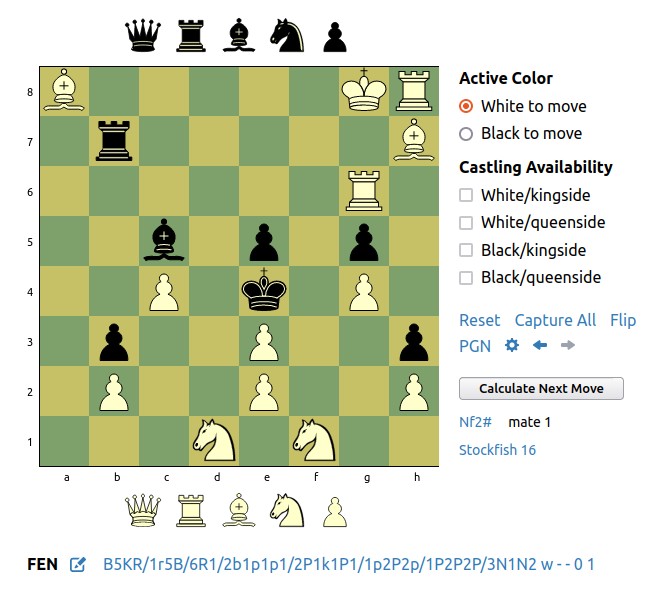

White has the next move, and must move a piece that does not cause mate. By methodically moving each piece, we eventually find that moving the white rook to C6 is the only move not result in checkmate. The position of the board ("the next situation") is then 

`B5KR/1r5B/2R5/2b1p1p1/2P1k1P1/1p2P2p/1P2P2P/3N1N2 b - - 0 1`

### Alternate Solution

Like other parts of this puzzle, we can use google to find that someone has also solved this puzzle online [on stack exchange](https://chess.stackexchange.com/questions/27130/uniquely-satisfying-puzzle). You'd still need to figure out the chess notation though.

# Password to Phase 3

Now we have all 7 parts, or at least good guesses to all parts we can try to decrypt the phase 3 blob

In [18]:
import hashlib
import subprocess

phase3_aes_file = "./phase2-assets/phase3_aes.txt"


# our sha256()
def do_sha_hash(s):
    if isinstance(s, str):
        s = s.encode()
    m = hashlib.sha256()
    m.update(s)
    return m.hexdigest()

def decrypt_file(password):
    password_hash = do_sha_hash(password)

    try:
        # using subprocess because it's difficult to
        # do decryption directly in python
        with open("./phase2-assets/phase3.txt", "w+") as fp:
            p = subprocess.run(
                [
                    "openssl",
                    "aes-256-cbc", # Our algorithm
                    "-in",
                    phase3_aes_file,
                    "-a", # the file is in "amoured" format base64
                    "-d", # decrypt it
                    "-pass",
                    f"pass:{password_hash}"
                ],
                check=True, # we expect it to run correctly
                stdout = fp,
                stderr = subprocess.DEVNULL,
            )
            p.check_returncode()
        
            print(f"decrypted with {password} ({password_hash})")
            return True
    except (subprocess.CalledProcessError, UnicodeDecodeError):
        # if either the command didn't return 0, or it gave us unicode garbage
        # we don't care
        pass
    return False




part1 = ['causality']
part2 = ['SafeNet']
part3 = ['Luna']
part4 = ['HSM']
part5 = [
    '11000',
    '11001',
    '11010',
    '11011',
    '11100',
    '11101',
    '11110',
    '11111',
]
part6 = ['0x736B6E616220726F662074756F6C69616220646E6F63657320666F206B6E697262206E6F20726F6C6C65636E61684320393030322F6E614A2F33302073656D695420656854']
part7 = ['B5KR/1r5B/2R5/2b1p1p1/2P1k1P1/1p2P2p/1P2P2P/3N1N2 b - - 0 1']

for p5 in part5:
    password = f"{part1[0]}{part2[0]}{part3[0]}{part4[0]}{p5}{part6[0]}{part7[0]}"
    if decrypt_file(password):
        break
else:
    print("Did not find password")

Did not find password


It looks like there's something not quite right about our parts. 
We haven't yet used the "/aaa connected" and related strings
Looking at them now, and our collection of parts, we might be able to infer a few things:

```
part1 = ['causality']  /(aaa, connected enf) 
part2 = ['SafeNet']
part3 = ['Luna']
part4 = ['HSM']
part5 = [
    '11000',
    '11001',
    '11010',
    '11011',
    '11100',
    '11101',
    '11110',
    '11111',
]
part6 = ['0x736B6E616220726F662074756F6C69616220646E6F63657320666F206B6E697262206E6F20726F6C6C65636E61684320393030322F6E614A2F33302073656D695420656854'] /(aBa, connected enf)
part7 = ['B5KR/1r5B/2R5/2b1p1p1/2P1k1P1/1p2P2p/1P2P2P/3N1N2 b - - 0 1'] /(aBa, connected not enf)
```


* aaa = all lower case
* aBa = mixed case
* "connected not enf" = there are spaces
* "connected enf" = "no spaces"

Given this, parts 2-4 we don't know the casing of, so we'll have to try different variations until we get it

In [19]:
def case_variations(s):
    yield s.lower()
    yield s.upper()
    yield s.title()

part1 = p1 = 'causality' # lower case
part2 = list(case_variations('SafeNet'))
part3 = list(case_variations('Luna'))
part4 = list(case_variations('HSM'))
part5 = [ # these don't have cases
    '11000',
    '11001',
    '11010',
    '11011',
    '11100',
    '11101',
    '11110',
    '11111',
]
# Case sensitive
part6 = p6 = '0x736B6E616220726F662074756F6C69616220646E6F63657320666F206B6E697262206E6F20726F6C6C65636E61684320393030322F6E614A2F33302073656D695420656854'
# case sensitive, leave the spaces
part7 = p7 = 'B5KR/1r5B/2R5/2b1p1p1/2P1k1P1/1p2P2p/1P2P2P/3N1N2 b - - 0 1'

def main():
    for p2 in part2:
        for p3 in part3:
            for p4 in part4:
                for p5 in part5:
                    password = f"{p1}{p2}{p3}{p4}{p5}{p6}{p7}"
                    if decrypt_file(password):
                        return True

if not main():
    print("did not find password")

decrypted with causalitySafenetLunaHSM111100x736B6E616220726F662074756F6C69616220646E6F63657320666F206B6E697262206E6F20726F6C6C65636E61684320393030322F6E614A2F33302073656D695420656854B5KR/1r5B/2R5/2b1p1p1/2P1k1P1/1p2P2p/1P2P2P/3N1N2 b - - 0 1 (1a57c572caf3cf722e41f5f9cf99ffacff06728a43032dd44c481c77d2ec30d5)


## Conclusion

* Again, we learnt that the url can be used as a clue
* There are still some pieces of text that we haven't been able to determine the meaning
* "..." can mean "replace with a value"
* Sometimes hints cannot be taken literally, but instead metaphorically


[Link to Phase 3](./phase3.ipynb)